In [1]:
# pip install webdriver_manager, selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

options = Options()
# chỉ chạy đoạn này nếu đã cài đặt Chrome-driver về máy cá nhân
driver = webdriver.Chrome(r"C:\Users\Admin\Downloads\chromedriver_win32\chromedriver.exe")
# có thể thay thế bằng
# options = Options()
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [2]:
driver.get("https://shopee.vn/daily_discover?pageNumber=1")

#### Scroll down hết màn hình

In [3]:
import time
for n_time in range(10):
    time.sleep(1)
    driver.execute_script("window.scrollTo(0, 1080)")

#### 1. Crawl item names

In [4]:
list_items = [x.text for x in driver.find_elements(By.CLASS_NAME, "dpiR4u")]
list_items

['Dép lông con sóc siêu cute xả khokho85k-85k sập giá\n#Shopdacbiet\n#ShopXuHuong',
 'Loa bluetooth mini không dây,nghe nhạc,giá rẻ,công nghệ blutooth 5.0 BINTECH\n#ShopXuHuong',
 'Áo thun LV 02 in chữ Luois.Vuitton LV Decal Trắng Đen tay lỡ form rộng Vải Cotton dành cho nam nữ\n10% Giảm\n#Shopdacbiet',
 'Dép nam nữ quai ngang dập chìm gucici hót 2023 size 38-43\n#Shopdacbiet\n#ShopXuHuong',
 'Gương trang điểm 2 mặt để bàn xinh xắn xoay 360 độ nhiều mẫu\nHome Club giảm 3%',
 'BÁNH TRÁNG PHƠI SƯơNG MỀM DẺO KÈM MUỐI TÉP HÀNH + BƠ (250g bánh tráng)\n#Shopdacbiet\n#ShopXuHuong',
 'Dép nhựa quai ngang DO siêu đẹp 5cm\n#Shopdacbiet\n#ShopXuHuong',
 'Tai Nghe Bluetooth M10 Pro Tai Nghe Không M10 Pro Phiên Bản Nâng Cấp Pin Trâu, Nút Cảm Ứng Tự Động Kết Nối - BINTECH\n#ShopXuHuong',
 '[Mã FATREND1104 giảm đến 30k đơn 99k] ÁO CARDIGAN, ÁO KHOÁC Nữ Form Rộng Viền Túi Đen Trắng',
 '[Mã FATREND1104 giảm đến 30k đơn 99k] Tee basic ss1 CREWZ áo thun tay lỡ unisex Local Brand -Lamo Store(V427)\n10% Gi

#### 2. Price

In [5]:
list_prices = [x.text for x in driver.find_elements(By.CLASS_NAME, "juCMSo")]
list_prices

['85.000',
 '60.000',
 '99.000',
 '84.000',
 '39.000',
 '59.000',
 '60.000',
 '125.000',
 '59.000',
 '95.000',
 '39.000',
 '65.000',
 '86.000',
 '99.000',
 '13.800',
 '69.000',
 '89.000',
 '25.000',
 '95.000',
 '3.500',
 '66.000',
 '55.000',
 '85.000',
 '59.000',
 '4.500',
 '69.000',
 '65.000',
 '15.000',
 '85.000',
 '75.000',
 '69.500',
 '79.000',
 '1.000',
 '3.200',
 '29.000',
 '99.000',
 '45.000',
 '79.800',
 '26.000',
 '99.000',
 '95.000',
 '19.000',
 '65.000',
 '39.000',
 '13.000',
 '85.000',
 '69.900',
 '99.000']

#### 3. Number of sold (doanh số đã bán)

In [7]:
[x.text for x in driver.find_elements(By.CLASS_NAME, 'r6HknA dQAXj1')]

[]

#### Notes
Tuy nhiên, để lấy được trường thông tin "số lượng đã bán" từ class `r6HknA dQAXj1` thì có lỗi xảy ra, do đó ta sẽ crawl toàn bộ khung chứa tất cả thông tin gồm `tên sản phẩm - giá - số lượng` với class `'KMyn8J'`

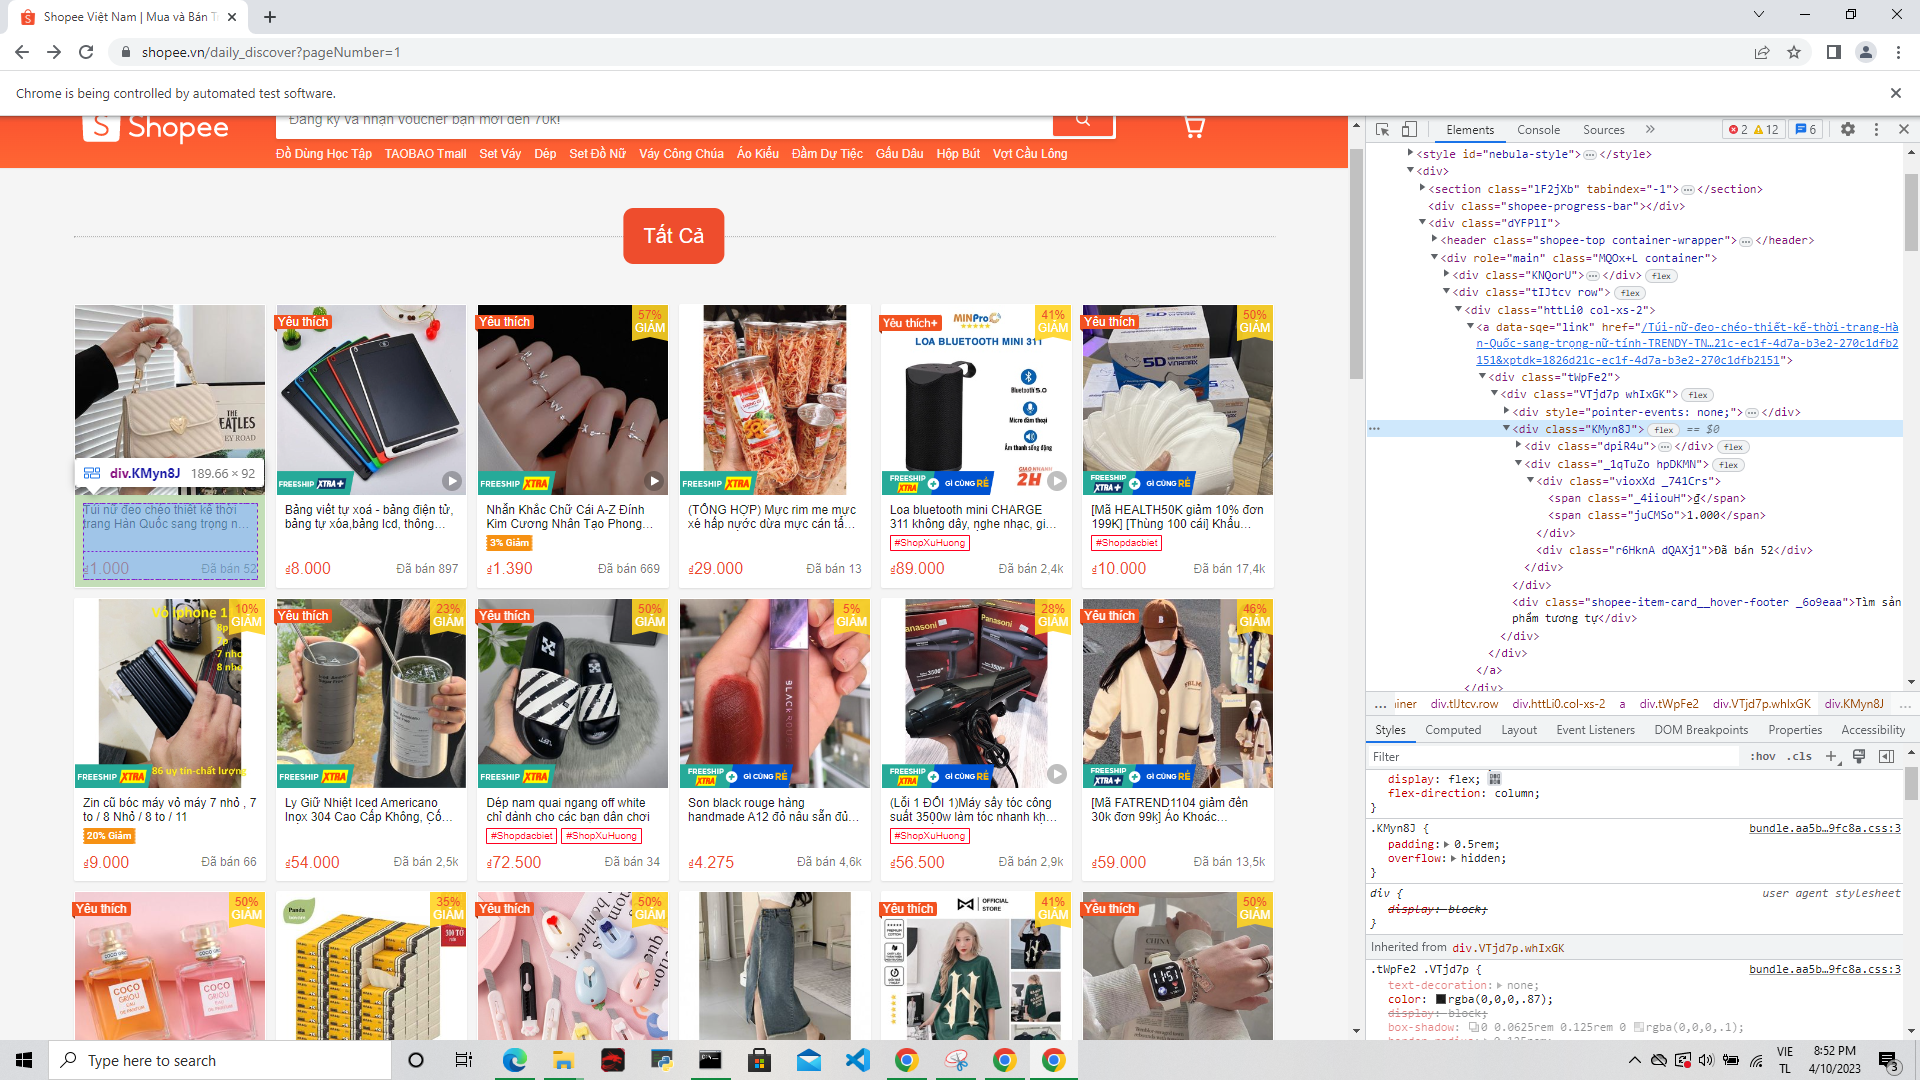

In [8]:
all_info = [x.text for x in driver.find_elements(By.CLASS_NAME, 'KMyn8J')]
all_info

['Dép lông con sóc siêu cute xả khokho85k-85k sập giá\n#Shopdacbiet\n#ShopXuHuong\n₫85.000\nĐã bán 5,2k',
 'Loa bluetooth mini không dây,nghe nhạc,giá rẻ,công nghệ blutooth 5.0 BINTECH\n#ShopXuHuong\n₫60.000\nĐã bán 5,7k',
 'Áo thun LV 02 in chữ Luois.Vuitton LV Decal Trắng Đen tay lỡ form rộng Vải Cotton dành cho nam nữ\n10% Giảm\n#Shopdacbiet\n₫99.000\nĐã bán 4k',
 'Dép nam nữ quai ngang dập chìm gucici hót 2023 size 38-43\n#Shopdacbiet\n#ShopXuHuong\n₫84.000\nĐã bán 1,8k',
 'Gương trang điểm 2 mặt để bàn xinh xắn xoay 360 độ nhiều mẫu\nHome Club giảm 3%\n₫39.000\nĐã bán 14,8k',
 'BÁNH TRÁNG PHƠI SƯơNG MỀM DẺO KÈM MUỐI TÉP HÀNH + BƠ (250g bánh tráng)\n#Shopdacbiet\n#ShopXuHuong\n₫59.000\nĐã bán 13,2k',
 'Dép nhựa quai ngang DO siêu đẹp 5cm\n#Shopdacbiet\n#ShopXuHuong\n₫60.000\nĐã bán 4,8k',
 'Tai Nghe Bluetooth M10 Pro Tai Nghe Không M10 Pro Phiên Bản Nâng Cấp Pin Trâu, Nút Cảm Ứng Tự Động Kết Nối - BINTECH\n#ShopXuHuong\n₫125.000\nĐã bán 3,4k',
 '[Mã FATREND1104 giảm đến 30k đơn 99k

#### Comment
Như vậy, lúc này mỗi dòng (trong `all_info`) chứa thông tin về các nhóm `item_name - tag - price - n_solds` và chúng được cách với nhau bởi dấu xuống dòng `\n`

Do đó, ta sẽ thiết lập lại code cho chúng như sau

In [12]:
items = []
tags = []
prices = []
n_solds = []
for row in all_info:
    row_split = row.split('\n')
    n_elm_row = len(row_split)
    items.append(row_split[0]) # phần tử đầu tiên
    prices.append(row_split[-2]) # phần tử thứ hai bên phải sang
    n_solds.append(row_split[-1]) # phần tử cuối cùng
    if n_elm_row == 4:
        tags.append(row_split[1])
    else:
        tags.append(''.join(row_split[1:-2]))
tags

['#Shopdacbiet#ShopXuHuong',
 '#ShopXuHuong',
 '10% Giảm#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 'Home Club giảm 3%',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 '#ShopXuHuong',
 '',
 '10% Giảm',
 '#Shopdacbiet#ShopXuHuong',
 '#ShopXuHuongFlash Sale',
 'Giảm ₫5k#ShopXuHuong',
 '#ShopXuHuong',
 '',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '',
 '#Shopdacbiet',
 '',
 '10% Giảm#ShopXuHuong',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet',
 '',
 'Giảm ₫5kFlash Sale',
 '',
 '#ShopXuHuong',
 '3% Giảm#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '',
 '#Shopdacbiet',
 '',
 'Giảm ₫5k#ShopXuHuong',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '',
 '#ShopXuHuong',
 '#ShopXuHuong',
 '5% Giảm',
 'Giảm ₫5k#ShopXuHuong',
 '#ShopXuHuong',
 '',
 '#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong']

#### Wraping up 1 page

In [13]:
import time
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

page_to_crawl = "https://shopee.vn/daily_discover?pageNumber="
page_num = 1
driver.get(f"{page_to_crawl}{page_num}")
for n_time in range(10):
    time.sleep(1)
    driver.execute_script("window.scrollTo(0, 1080)")

items = []
tags = []
prices = []
n_solds = []
all_info = [x.text for x in driver.find_elements(By.CLASS_NAME, 'KMyn8J')]

for row in all_info:
    row_split = row.split('\n')
    n_elm_row = len(row_split)
    items.append(row_split[0]) # phần tử đầu tiên
    prices.append(row_split[-2]) # phần tử thứ hai bên phải sang
    n_solds.append(row_split[-1]) # phần tử cuối cùng
    if n_elm_row == 4:
        tags.append(row_split[1])
    else:
        tags.append(''.join(row_split[1:-2]))

pd.DataFrame({'items': items, 'tags': tags, 'price': prices, 'n_sold': n_solds})

,items,tags,price,n_sold
0,Dép lông con sóc siêu cute xả khokho85k-85k sậ...,#Shopdacbiet#ShopXuHuong,₫85.000,"Đã bán 5,2k"
1,Tai nghe bluetooth 5.0 True Wireless Amoi F9 P...,#ShopXuHuong,₫99.000,"Đã bán 5,1k"
2,BÁNH TRÁNG PHƠI SƯơNG MỀM DẺO KÈM MUỐI TÉP HÀN...,#Shopdacbiet#ShopXuHuong,₫59.000,"Đã bán 13,2k"
3,Áo Phông Nam Nữ Mikenco Helen Angel Chất Liệu ...,,₫13.800,Đã bán 257
4,"[Video, Ảnh Thật]Áo Khoác Nỉ Bông Thêu Hoodie ...",#ShopXuHuong,₫72.900,"Đã bán 4,6k"
5,Dép bánh mì sticker phi hành gia quai ngang nữ...,#Shopdacbiet#ShopXuHuong,₫39.000,"Đã bán 5,6k"
6,Free Ship - Thùng 100 chiếc khẩu trang 5d Thịn...,,₫25.000,"Đã bán 25,4k"
7,"Set Croptop 3 Món Quần Chun Suông, Chất Cotton...",Giảm ₫5k#ShopXuHuong,₫86.000,"Đã bán 3,1k"
8,Giày thể thao vải nam nữ độn đế mũi viền kẻ Ca...,#Shopdacbiet#ShopXuHuong,₫89.000,"Đã bán 12,1k"
9,Dép nhựa quai ngang DO siêu đẹp 5cm,#Shopdacbiet#ShopXuHuong,₫60.000,"Đã bán 4,8k"


#### Wraping up all pages

In [15]:
df_to_stored = pd.DataFrame({})

page_to_crawl = "https://shopee.vn/daily_discover?pageNumber="

for page_num in range(1, 30):
    try:
        driver.get(f"{page_to_crawl}{page_num}")
    # nếu trang đell tồn tại, break
    except:
        break
    for n_time in range(10):
        time.sleep(1)
        driver.execute_script("window.scrollTo(0, 1080)")

    items = []
    tags = []
    prices = []
    n_solds = []
    all_info = [x.text for x in driver.find_elements(By.CLASS_NAME, 'KMyn8J')]

    for row in all_info:
        row_split = row.split('\n')
        n_elm_row = len(row_split)
        items.append(row_split[0]) # phần tử đầu tiên
        prices.append(row_split[-2]) # phần tử thứ hai bên phải sang
        n_solds.append(row_split[-1]) # phần tử cuối cùng
        if n_elm_row == 4:
            tags.append(row_split[1])
        else:
            tags.append(''.join(row_split[1:-2]))

    crawl_df = pd.DataFrame({'items': items, 'tags': tags, 'price': prices, 'n_sold': n_solds})
    
    df_to_stored = pd.concat([df_to_stored, crawl_df]).reset_index(drop=True)
    
df_to_stored

,items,tags,price,n_sold
0,"Dép CCOVERNATS Unisex hàng cao cấp, thời trang...",Flash Sale,₫87.400,"Đã bán 1,3k"
1,Quần Short Nhung Tăm Cho Nữ Ấm Đẹp Hách Dáng 66,#Shopdacbiet,₫55.000,"Đã bán 13,3k"
2,Ốp Điện Thoại Silicon Mềm Chống Sốc 3 Trong 1 ...,,₫24.000,Đã bán 31k
3,"Thùng 100c Khẩu trang 5D KENKO kháng khuẩn, kh...",#ShopdacbietFlash Sale,₫18.000,Đã bán 69k
4,Bút Đen gel Nhám Màu Bút Ngòi 0.38mm Cho Học S...,,₫1.990,"Đã bán 264,8k"
...,...,...,...,...
1387,Túi xách nữ Năng Động Cá Tinh quai xách cao cấ...,,₫1.000,Đã bán 136
1388,Đồng hồ với dây đeo bằng thép không gỉ thiết k...,,₫39.000,"Đã bán 7,9k"
1389,Túi xách nữ dáng đẹp túi nữ đeo chéo thiết kế ...,,₫4.000,Đã bán 66
1390,"Váy Cổ Vuông Rúm Ngực Thắt Nơ Lưng Ulzzang, Đầ...",#Shopdacbiet#ShopXuHuong,₫74.500,"Đã bán 9,2k"


#### Lưu nó lại!!

In [ ]:
#df_to_stored.to_csv('shopee.csv', index=False)